In [ ]:
# end = 30000 za dużo

In [2]:
class TestInput:
    def __init__(self):
        self.start=500
        self.step=300
        self.end=30000
        self.per_size=5
    def __iter__(self):
        self.current_size=self.start
        self.i=self.per_size
        return self
    def __next__(self):
        if self.i == 1:
            self.current_size += self.step
            self.i=self.per_size+1
            if self.current_size > self.end:
                raise StopIteration
        self.i-=1
        size = self.current_size
        return size

In [3]:
import numpy as np
import os

data_file = open("data", "w")

x = []
for n in TestInput():
    if n not in x:
        x.append(n)
    if n==0:
        continue
    array = np.random.choice(np.arange(0, n), replace=False, size=n)
    data = ' '.join(str(x) for x in array)
    data_file.write(str(n) + ' ' + data + '\n')
data_file.close()
print("OK")

OK


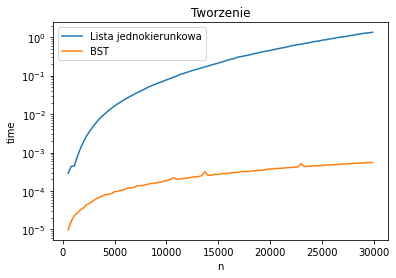

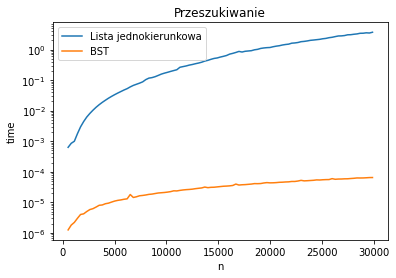

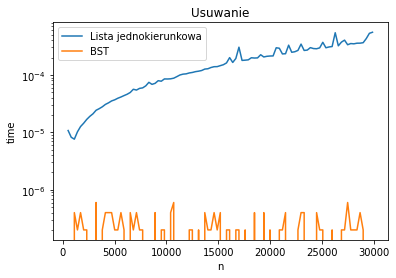

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ll1 = open("wyniki/linked_list.time", "r")
ll1 = np.loadtxt(ll1)
ll2 = open("wyniki/bst.time", "r")
ll2 = np.loadtxt(ll2)
times = np.concatenate((ll1, ll2), axis=1)
times = pd.DataFrame(times, columns=['n', 'Create1', 'Search1', 'Delete1', 'm', 'Create2', 'Search2', 'Delete2']).groupby('n').mean()
del times['m']


create = times.filter(regex='Create.|n')
create = create.rename(columns = {
    'Create1':'Lista jednokierunkowa',
    'Create2':'BST'
})
fg = create.plot(title='Tworzenie', ylabel='time', logy=True).get_figure()
fg.savefig('create.jpg')
fg.savefig('create.pdf')
fg.savefig('create.png')
 
search = times.filter(regex='Search.|n')
search = search.rename(columns = {
    'Search1':'Lista jednokierunkowa',
    'Search2':'BST'
})
fg = search.plot(title='Przeszukiwanie', ylabel='time', logy=True).get_figure()
fg.savefig('search.jpg')
fg.savefig('search.png')
fg.savefig('search.pdf')

delete = times.filter(regex='Delete.|n')
delete = delete.rename(columns = {
    'Delete1':'Lista jednokierunkowa',
    'Delete2':'BST'
})
fg = delete.plot(title='Usuwanie', ylabel='time', logy=True).get_figure()
fg.savefig('delete.jpg')
fg.savefig('delete.png')
fg.savefig('delete.pdf')
    
